In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import cross_validation
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm, grid_search, datasets
from sklearn import lda
import mpld3
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [77]:
iris = pd.read_csv("iris.data", header = -1)
irism = iris.as_matrix()

#Randomize the index
rindex = sklearn.utils.shuffle(range(0,len(irism)))

#randomize inditial matrix
matrix = irism[rindex,:]
irism = matrix

In [78]:
#Split test and train matrix
trainint, testint = cross_validation.train_test_split(irism, test_size=0.33, random_state=1)

#Remove labels
xtrain = trainint[:,:4]
ytrain = trainint[:,4]
xtest = testint[:,:4]
ytest = testint[:,4]

#Scale predictors for Xs on test and train
scaler = sklearn.preprocessing.StandardScaler()
scalefit = scaler.fit(xtrain)
scale_xtrain = scaler.transform(xtrain)
scale_xtest = scaler.transform(xtest)

#Create total scaled matrix for easier access
total_scale_x  = np.ma.row_stack((xtrain,xtest))
total_scale_y = np.concatenate((ytrain,ytest))

#Recombine
train = np.column_stack((scale_xtrain,ytrain))
test = np.column_stack((scale_xtest,ytest))



In [79]:
#parameters = {'fit_intercept':('True', 'False'), 'C': numpy.arange(0.1, 1, 0.001),}
lda = sklearn.lda.LDA()


In [80]:
from sklearn.learning_curve import learning_curve
trainlist = numpy.arange(5, 40, 1)
train_sizes, train_scores, test_scores = learning_curve(lda, scale_xtrain, ytrain, train_sizes = trainlist)

In [81]:
%matplotlib inline

def plotter(train_scores,test_scores):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Testing score")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title('Training Curves')
    plt.show()

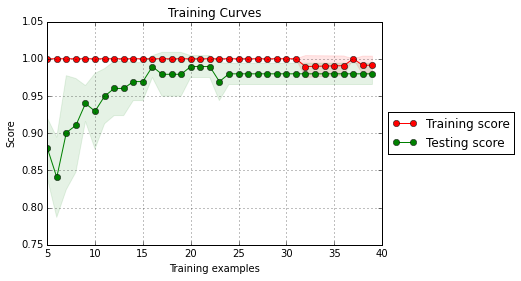

In [82]:
plotter(train_scores,test_scores)

In [83]:
#parameters = {'solver':('svd', 'Isqr','eigen'), 'shrinkage': numpy.arange(0.1, 1, 0.01),}

In [84]:
lda = sklearn.lda.LDA(solver = "eigen")
lda.fit(scale_xtrain,ytrain)
outcomes = lda.score(scale_xtest,ytest)
predictions = lda.predict_proba(scale_xtest)



In [85]:
trainlist = numpy.arange(10, 30, 1)
train_sizes, train_scores, test_scores = learning_curve(lda, scale_xtrain, ytrain, train_sizes = trainlist)

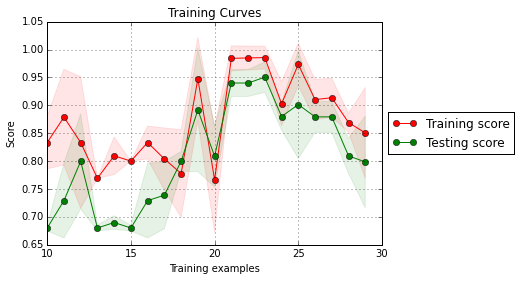

In [86]:
plotter(train_scores,test_scores)

In [87]:
pca = PCA(n_components=4)
fit = pca.fit(total_scale_x)
pca_scores = pca.transform(total_scale_x)

#COMBINE INTO DATAFRAME
pca_m = np.column_stack((pca_scores,total_scale_y))

lda_scores = lda.transform(total_scale_x)
lda_m = np.column_stack((lda_scores,total_scale_y))

In [88]:
lda_scores

array([[ -3.17063580e-01,   8.51837139e-01,  -2.80422196e-01,
         -2.97740766e+00],
       [ -3.51479723e+00,  -2.44529584e-01,  -1.82567098e+00,
         -2.93858551e+00],
       [ -4.92278821e+00,  -8.41065140e-01,  -2.35935316e+00,
         -4.03115457e+00],
       [ -4.92656105e+00,  -3.64573087e-01,  -2.25241995e+00,
         -3.28774124e+00],
       [ -3.07571780e+00,  -2.42938478e-01,  -1.45688354e+00,
         -3.04250369e+00],
       [ -4.03234934e+00,  -7.66350137e-01,  -1.96305206e+00,
         -3.29980587e+00],
       [ -2.78128862e-01,   8.07594759e-01,  -2.54292472e-01,
         -3.48603727e+00],
       [ -4.46877963e-01,   6.71522786e-01,  -3.38568588e-01,
         -3.64240684e+00],
       [ -4.73182557e+00,  -9.28116020e-02,  -2.14463415e+00,
         -2.83289627e+00],
       [ -5.61893294e-01,   1.01142652e+00,  -1.98355999e-01,
         -3.07366449e+00],
       [ -3.30495572e-01,   5.82316993e-01,  -3.15297972e-01,
         -3.35746216e+00],
       [ -3.45100243e

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


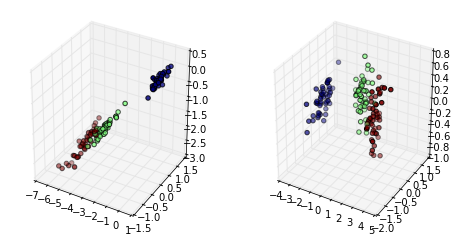

In [89]:
#%pylab qt
%pylab inline
fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
#ax1 = Axes3D(fig, elev=-150, azim=110)
le = preprocessing.LabelEncoder()
y = le.fit_transform(total_scale_y)
ax.scatter(lda_scores[:,0], lda_scores[:,1], lda_scores[:,2], c = y)

ax = fig.add_subplot(1, 2, 2, projection='3d')

le = preprocessing.LabelEncoder()
y = le.fit_transform(total_scale_y)
ax.scatter(pca_scores[:,0], pca_scores[:,1], pca_scores[:,2], c = y)

    
plt.show()


Populating the interactive namespace from numpy and matplotlib


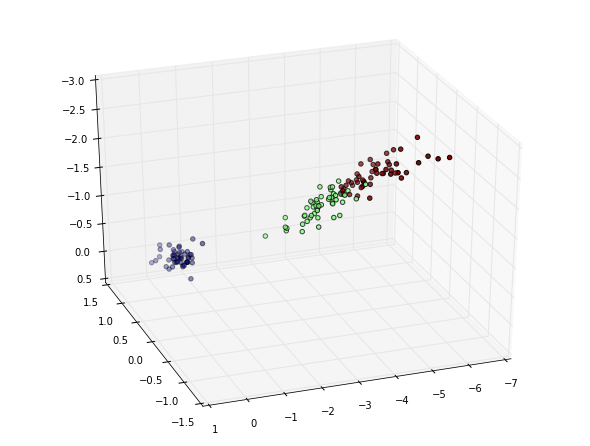

In [90]:
%pylab qt
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
le = preprocessing.LabelEncoder()
y = le.fit_transform(total_scale_y)

ax.scatter(lda_scores[:,0], lda_scores[:,1], lda_scores[:,2], c = y)
plt.show()

In [91]:
%pylab qt
fig = plt.figure(1, figsize=(8, 6))
#ax = Axes3D(fig, elev=-150, azim=110)
le = preprocessing.LabelEncoder()
y = le.fit_transform(total_scale_y)

ax.scatter(pca_scores[:,0], pca_scores[:,1], pca_scores[:,2], c = y)
plt.show()

Populating the interactive namespace from numpy and matplotlib


Populating the interactive namespace from numpy and matplotlib


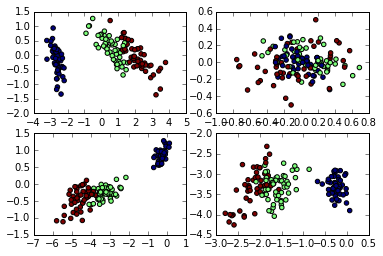

In [92]:
%pylab inline

plt.figure(1)
plt.subplot(221)
plt.scatter(pca_scores[:,0], pca_scores[:,1], c = y)
plt.subplot(222)
plt.scatter(pca_scores[:,2], pca_scores[:,3], c = y)

plt.subplot(223)
plt.scatter(lda_scores[:,0], lda_scores[:,1], c = y)
plt.subplot(224)
plt.scatter(lda_scores[:,2], lda_scores[:,3], c = y)



plt.show()

Populating the interactive namespace from numpy and matplotlib


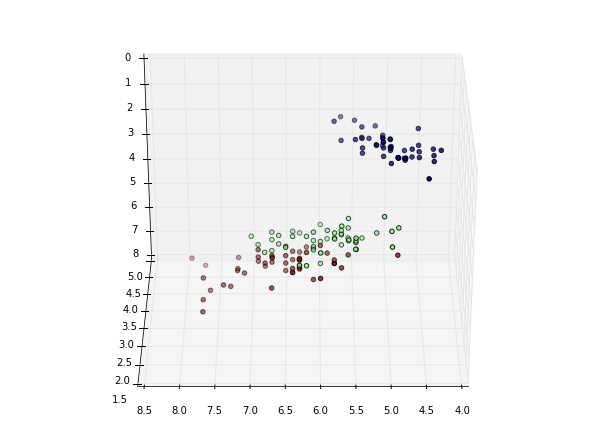

In [93]:
%pylab qt
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=90)
le = preprocessing.LabelEncoder()
y = le.fit_transform(total_scale_y)
ax.scatter(total_scale_x[:,0], total_scale_x[:,1], total_scale_x[:,2], c = y)
plt.show()


In [96]:
kf = cross_validation.KFold(50, n_folds=3)
lda = sklearn.lda.LDA()
score_list = []
for (trindex, testindex) in kf:
    lda.fit(total_scale_x[trindex,:4], total_scale_y[trindex])
    score_list.append([lda.score(total_scale_x[testindex,:4],total_scale_y[testindex]),len(trindex),len(testindex)])
print np.array(score_list)

[[  1.  33.  17.]
 [  1.  33.  17.]
 [  1.  34.  16.]]
